# Day 1 (29 October 2025)
## Understanding Vectors (Notes: Banesh Hoffmann's _About Vectors_)

### Chapter 1
#### 1. Defining Vector
- Good definitions are _hard_!
- Plato's story:
```
Plato: Man is an animal without feathers.
Diogenes: [Brings a plucked cock] Here's Plato's Man.
Plato: Man is an animal without feathers and having broad nails.
Diogenes: [Reappears with the previously plucked feathers and gives them to Plato.]
```
- Question: Is Plato a Man?
#### Exercise 1.2:
- Q: Under what circumstances could an elephant qualify as a Man according to the above definition?
- A: When a 2-legged elephant is born.

```
A vector is often defined as an entity having both magnitude and direction. But that is _not_ a good definition.
```
- To make it a more exclusive definition, we need to tighten it. Anything that has a magnitude and direction is not a vector.

#### Exercise 1.3:
- Q: Define a _door_.
- A: A door is a hinged rectangular opening in the walls of a room meant for people's entry or exit.
#### Exercise 1.4:
- Q: Pick holes in your definition of a _door_.
- A: No holes ;-)
#### Exercise 1.5:
- Q: According to your definition, is a movable partition between two rooms a door?
- A: No, it's a partition.

The point of all these exercises is that math requires good, clear definitions.

#### 2. The Parallelogram Law of Addition or Combination of Two Vectors
- The _resultant_ (vector) $\vec{OR}$ of two vectors $\vec{OP}$ and $\vec{OQ}$ is represented by the diagonal of the parallelogram formed with the two vectors represented by its adjacent sides.
- The resultant can be found by just placing vectors end-to-end.

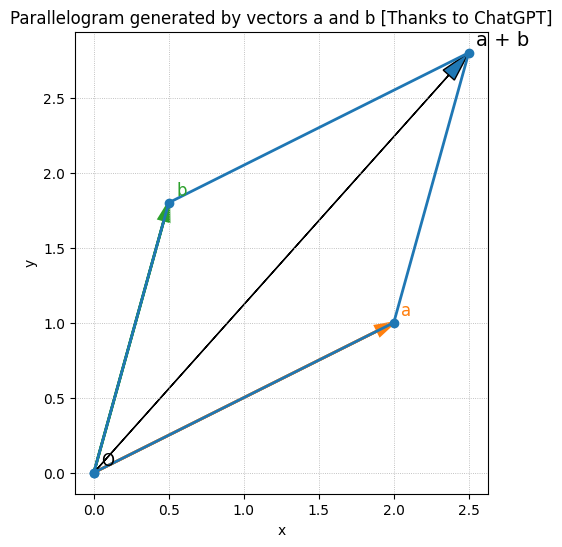

In [41]:
from email.base64mime import header_length

# Plot a parallelogram using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define origin and two edge vectors a, b
O = np.array([0.0, 0.0])
a = np.array([2.0, 1.0])   # change these to try different parallelograms
b = np.array([0.5, 1.8])

# Parallelogram vertices: O, a, a+b, b
a_plus_b = a + b
verts = np.vstack([O, a, a_plus_b, b, O])

fig, ax = plt.subplots(figsize=(6,6))

# Draw parallelogram (edges)
ax.plot(verts[:,0], verts[:,1], '-o', linewidth=2)

# Fill for clarity (semi-transparent)
#ax.fill(verts[:,0], verts[:,1], alpha=0.15)

# Draw the generating vectors as arrows
ax.arrow(O[0], O[1], a[0], a[1], head_width=0.07, head_length=0.12, fc='C1', ec='C1', linewidth=2, length_includes_head=True)
ax.arrow(O[0], O[1], b[0], b[1], head_width=0.07, head_length=0.12, fc='C2', ec='C2', linewidth=2, length_includes_head=True)

# Draw the resultant
ax.arrow(O[0], O[1], a_plus_b[0], a_plus_b[1], head_width=0.1, head_length=0.2, length_includes_head=True)
# Optionally draw diagonals for reference
#ax.plot([O[0], (a + b)[0]], [O[1], (a + b)[1]], '--', color='gray', linewidth=1)
#ax.plot([a[0], b[0]], [a[1], b[1]], '--', color='gray', linewidth=1)

# Labels and styling
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle=':', linewidth=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Parallelogram generated by vectors a and b [Thanks to ChatGPT]')

# Annotate points and vectors
ax.text(*O + 0.05, 'O', fontsize=12)
ax.text(*(a + 0.05), 'a', color='C1', fontsize=12)
ax.text(*(b + 0.05), 'b', color='C2', fontsize=12)
ax.text(*(a_plus_b + 0.05), 'a + b', fontsize=14)

plt.show()


In [24]:
np.dot(np.array([1,2]), np.array([2,1]))

np.int64(4)

### 2. Continued ...
#### Exercise 2.9
- Q: In Exercises 2.6, 2.7, and 2.8, is it essential that the three vectors OA, OB, and OC lie in a plane? Give a rule for finding the resultant of three noncoplanar vectors OA, OB, and OC that is analogous to the parallelogram law, and that might well be called the _parallelepiped law_. Prove that their resultant is the same regardless of the order in which one combines them.
- A: No, coplanarity of vectors isn't needed. This is because two points define a line and three points define a plane. We add any number of vectors two at a time. We bring second summand (vector) to the end of the first summand (vector) and we get three points which define a plane. See below for an illustration.

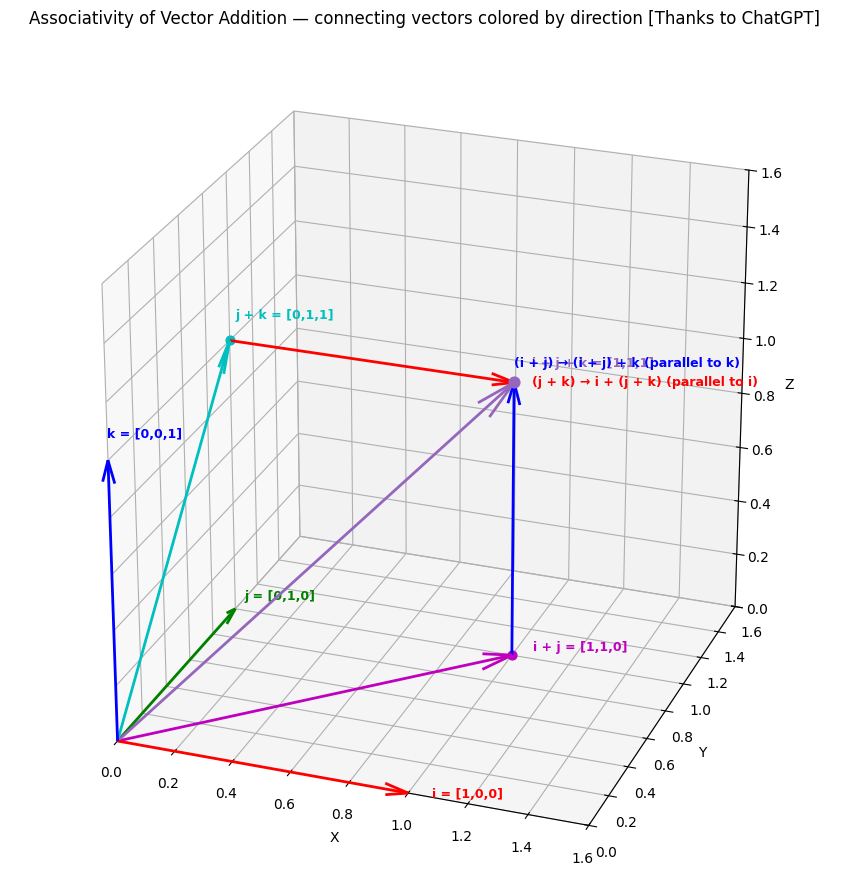

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Unit vectors
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

# Intermediate and final sums
ij = i + j       # [1,1,0]
jk = j + k       # [0,1,1]
ijk = i + j + k  # [1,1,1]

# Plot
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

def draw_vec(start, vec, color, label, txt_offset=0.08):
    """Draw vector from start with label offset so label is visible."""
    ax.quiver(start[0], start[1], start[2],
              vec[0], vec[1], vec[2],
              color=color, arrow_length_ratio=0.08, linewidth=2)
    end = start + vec
    # label position slightly past the tip along the vector direction (or fallback)
    norm = np.linalg.norm(vec)
    if norm == 0:
        label_pos = end + np.array([txt_offset, txt_offset, txt_offset])
    else:
        label_pos = end + txt_offset * (vec / norm)
    ax.text(label_pos[0], label_pos[1], label_pos[2], label, color=color, fontsize=9, weight='bold')

# Base unit vectors with consistent colors
draw_vec(np.zeros(3), i, 'r', 'i = [1,0,0]')
draw_vec(np.zeros(3), j, 'g', 'j = [0,1,0]')
draw_vec(np.zeros(3), k, 'b', 'k = [0,0,1]')

# Intermediate resultants from origin (distinct colors)
draw_vec(np.zeros(3), ij, 'm', 'i + j = [1,1,0]')
draw_vec(np.zeros(3), jk, 'c', 'j + k = [0,1,1]')

# Final resultant from origin
draw_vec(np.zeros(3), ijk, 'tab:purple', 'i + j + k = [1,1,1]')

# Now the connecting vectors, colored by the direction they are parallel to:
# (i + j) -> (i + j + k) is parallel to k  => use blue
# (j + k) -> (i + j + k) is parallel to i  => use red
draw_vec(ij, k, 'b', '(i + j) → (i + j) + k (parallel to k)', txt_offset=0.06)
draw_vec(jk, i, 'r', '(j + k) → i + (j + k) (parallel to i)', txt_offset=0.06)

# Mark tips for clarity
ax.scatter(*ij, color='m', s=40)
ax.scatter(*jk, color='c', s=40)
ax.scatter(*ijk, color='tab:purple', s=60)

# Formatting
ax.set_xlim(0, 1.6)
ax.set_ylim(0, 1.6)
ax.set_zlim(0, 1.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Associativity of Vector Addition — connecting vectors colored by direction [Thanks to ChatGPT]', pad=20)
ax.view_init(elev=25, azim=-70)  # ~30% rotation about z-axis
ax.set_box_aspect([1,1,1])

plt.tight_layout()
plt.show()


#### 3. Journeys are not Vectors
- Hoffmann elucidates that not everything that has a magnitude and a direction is a vector. He cites the example of one traveling from point A to point B in space. He writes sharply:
```
It is all very well to start with a definition. But it is not very enlightening.

Why should scientists and mathematicians be interested in objects that have
magnitude and direction and combine according to the parallelogram law?

Why did they even think of such objects? Indeed, do such objects exist at all
—outside of the imaginations of mathematicians?
```

- We encounter a new term (abstraction) _shift_ that he defines as "a movement from an arbitrary point to another arbitrary point in space."
- He then draws various "journeys" from A to B that, of course, result in the same "shift".
- He asks: If I walk in a straight line from A to B and then in a straight line from B to C, I make a journey from A to C, but it is not the same as if I walked directly in a straight line from A to C: the scenery is different, and so is the amount of shoe leather
consumed, **most likely**, and we can easily think of several other differences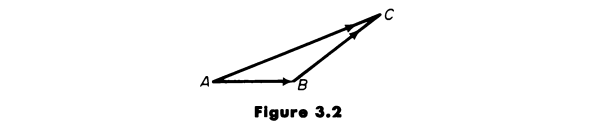
#### Exercise 3.2
- Q: Why **most likely**?
- A: Because the distances are different and terrain comparable. We might not say that if the distances are _not_ different, the leather wears are the same, but we can be much more confident saying that if the distances are _not_ the same, the leather wears are very likely to be different.

- Furthermore, Hoffmann says: `Journeys, then, are not vectors. But when we deal with shifts we ignore
such things as the scenery and the amount of shoe leather consumed. A shift from A to B followed by a shift from B to C is indeed _equivalent to_ a shift from A to C.` And since _shifts_ cannot be realized unless the starting point of a _shift_ actually coincides with the endpoint of a previous shift in a series of shifts. Therefore, he concludes, shifts (where we ignore how we move considering only the start and endpoints) are not vectors (in the same sense as some other "vectors"; see below).

### 4. Displacements are Vectors

- Hoffmann deftly explains why "displacements" are **vectors** (not just shifts or journeys): In Figure 4.1, the arrow-headed line segments AB and LM are parallel and of equal length. **Any journey from A to B is bound to be different from a journey from L to M**. Also, **the shift from A to B is different from that from L to M because the starting points are different, as are the end points**. But the two shifts, and thus also the various journeys, **yield the same displacement**: if, for example, B is 5 miles northeast of A, so too is M 5 miles northeast of L, and the displacement is one of 5 miles in the direction northeast. 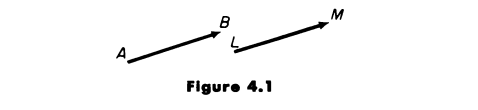


#### Exercise 4.1
- Q: Starting from a point A, a man bicycles 10 miles due east to point B, stops for lunch, sells his bicycle, and then walks 10 miles due north to point C. Another man starts from B, walks 4 miles due north and 12 miles due east and then, feeling tired, and having brought along a surplus of travellers’ checks, buys a car and drives 6 miles due north and 2 miles due west, ending at point D in the pouring rain. What displacement does each man undergo?
- A (This is an example of lively humor by Hoffmann): Draw the diagrams and we'll see that **their displacements are identical: $10\sqrt{2}$ miles due northeast**.

Now look at Figure 2.1. The shift from O to P followed by the shift from P to R is equivalent to the shift from O to R. The shift from P to R gives a displacement $\vec{PR}$ that is the same as the displacement $\vec{OQ}$. Therefore, the displacement $\vec{OP}$ followed by the displacement $\vec{OQ}$ is equivalent to the displacement $\vec{OR}$. 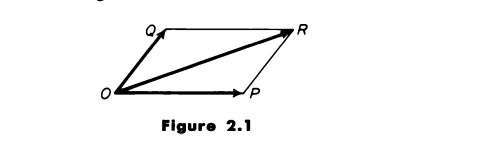

Thus, displacements have magnitude and direction and combine according to the parallelogram law. According to our definition, they are therefore vectors. Since displacements such as $\vec{AB}$ and $\vec{LM}$ in Figure 4.1 are counted as identical, **displacements are free vectors**, and thus are somewhat special. **In general, vectors such as $\vec{AB}$ and $\vec{LM}$ are _not_ counted as identical** (e.g. force).


### 5. Why Vectors are Important
- This is some of the best writing on _Abstraction_! Rather than reading my notes about it, one should just read it; I can't abstract it out well enough. A teaser: At first sight it would seem that we have come to so pale a ghost of a journey that it could have little mathematical significance. But we must not underestimate the potency of the mathematical process of abstraction. Vectors happen to be extremely important in science and mathematics.
- It reminded me of Picasso's [Le Taureau](https://en.wikipedia.org/wiki/Le_Taureau), which effectively describes the process of a bull's evolution in 11 drawings where Picasso, gradually sheds the nonessential parts of a 'bull'.
- He introduces _free vectors_ (e.g. displacement) and _bound vectors_ (e.g. force) and explain how they are similar and different. I admit that I had not realized this difference until now!
- Last statement in his first chapter: One of the things that gives mathematics its power is the **shedding of attributes that turn out not to be essential, for this, after all**, is just the process of abstraction.